In [3]:
from keras.preprocessing.image import ImageDataGenerator
import math
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # use this because the kernel was crashing a lot 

data_gen = ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             zoom_range=0.2)

In [4]:
import numpy as np

def GenerateImages(generator, image, num_images):
    new_images = []
    # we need to reshape the image because the generator.flow() 
    # expects an array of images
    image = np.reshape(image, (1,) + image.shape)
    for _ in range(num_images):
        batch = next(generator.flow(image, batch_size=1))
        new_images.append(batch[0])
    return np.array(new_images)

In [5]:
import skimage as ski

# loads the image and converts it to a floating-point image, 
# where pixel values are represented in the range [0, 1].
image = ski.io.imread("BUas_1.png")
image = ski.util.img_as_float(image)

augmented_images = GenerateImages(data_gen, image, 9)

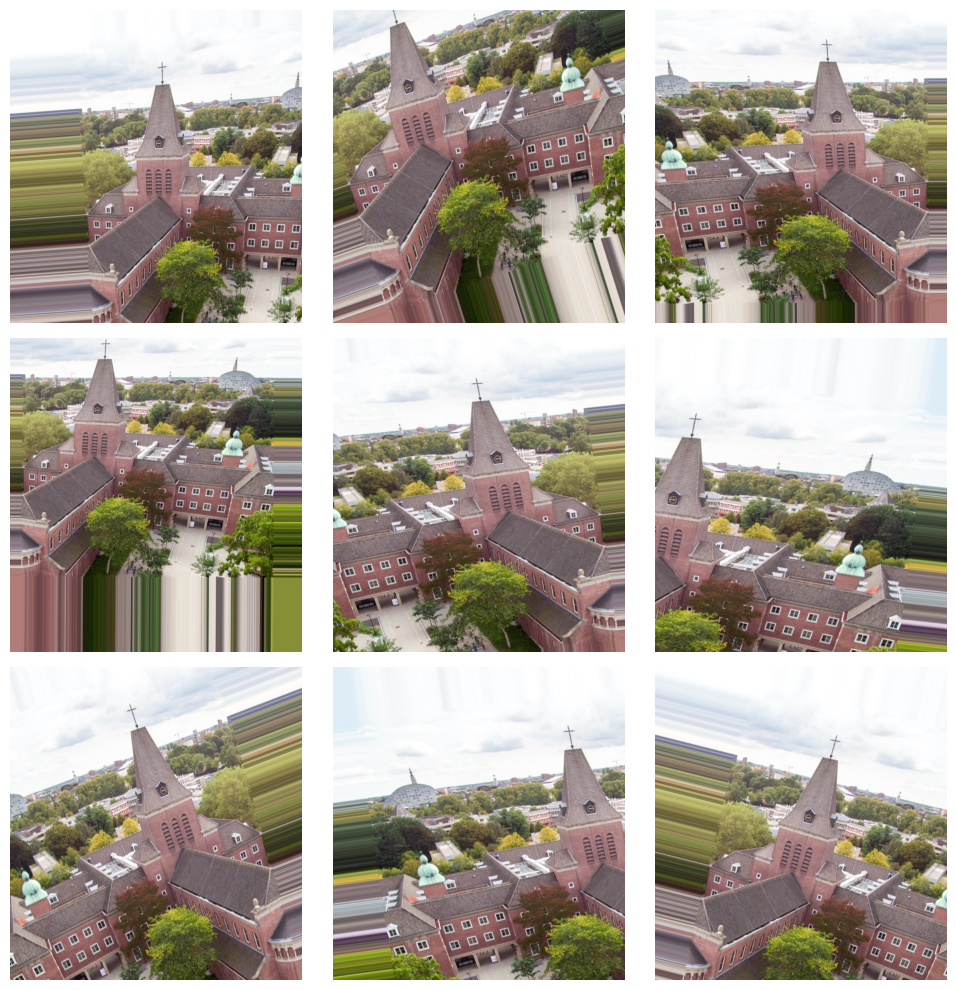

In [6]:
import matplotlib.pyplot as plt

num_images = len(augmented_images)
grid_size = int(math.ceil(math.sqrt(num_images)))

fig, axes = plt.subplots(nrows=grid_size, ncols=grid_size, figsize=(10, 10))
axes = axes.flatten()

for i in range(grid_size * grid_size):
    if i < num_images:
        axes[i].imshow(augmented_images[i])
        axes[i].axis('off')
    else:
        axes[i].axis('off')   
        
plt.tight_layout()
plt.show()

In [7]:
for i in range(num_images):
    # converts the image to a uint8 image (pixel  
    # values are represented in the range [0, 255]), 
    # and then saves the image.    
    image = ski.util.img_as_ubyte(augmented_images[i])
    ski.io.imsave("img_" + str(i) + ".png", image)

In [9]:
import keras
from keras import layers
import numpy as np

# creates the the preprocessing layer for data augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

# loads the image and converts it to a floating-point image
image = ski.io.imread("BUas_1.png")
image = ski.util.img_as_float(image)

# we need to reshape the image because the preprocessing layer 
# expects an array of images
image = np.reshape(image, (1,) + image.shape)

augmented_images = []
num_images = 9
for _ in range(num_images):
    # generates an augmented image
    augmented = data_augmentation(image)
    augmented_images.append(augmented[0])